In [46]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('/content/drive/MyDrive/자비스앤빌런즈/Jobis_3o3.csv')

In [4]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [5]:
# 수수료를 지불한 사람은 1, 그렇지 않은 사람은 0
df['has_paid'] = df['has_paid'].apply(lambda x: 1 if x else 0)

In [6]:
# 결측값을 0으로 변환
df.fillna(0, inplace=True)

In [7]:
# 성별 결측치 제거
df = df[df['gender']!='-']

In [8]:
df['예상환급액-수수료'] = df['refund'] - df['fee']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
# 소득 합계 칼럼 추가
df['income_합계'] = df['income_근로'] + df['income_사업'] + df['income_기타']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료,income_합계
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,4600.0,10062000.0
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,98300.0,19907000.0
2,28.0,F,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,277500.0,1461000.0
3,27.0,M,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,393800.0,2471000.0
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,0.0,109700.0,689000.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,1,0.0,0.0,680000.0,289100.0,680000.0
99996,62.0,F,2019,77000.0,1300.0,1,0.0,463000.0,0.0,75700.0,463000.0
99997,24.0,M,2020,9000.0,400.0,0,7923000.0,54000.0,0.0,8600.0,7977000.0
99998,24.0,M,2019,34000.0,400.0,1,0.0,204000.0,0.0,33600.0,204000.0


In [11]:
group1 = df[df['예상환급액-수수료']>0] # 보통의 경우
group2 = df[(df['예상환급액-수수료']<=0) & (df['has_paid']==1)] # 적자 혹은 수익이 없는데도 수수료를 결제한 경우 
group3 = df[(df['예상환급액-수수료']<=0) & (df['has_paid']==0)] # 적자 혹은 수익이 없기 때문에 수수료를 미결제한 경우

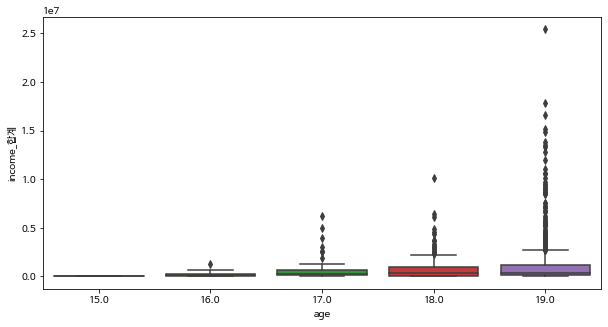

In [12]:
# 10대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[group1['age']<20], x ='age',y='income_합계')

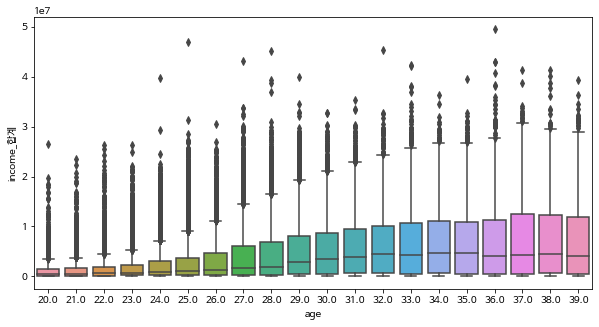

In [13]:
# 20대~30대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 20) & (group1['age']<40)], x ='age',y='income_합계')

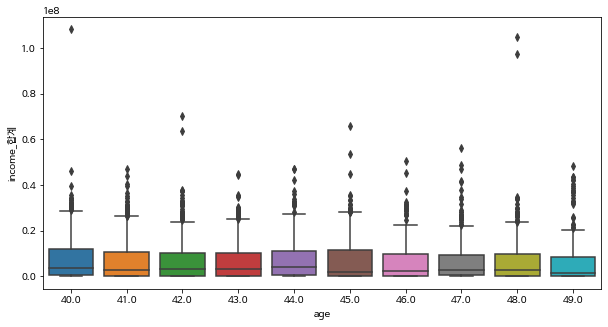

In [14]:
# 40대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 40) & (group1['age']<50)], x ='age',y='income_합계')

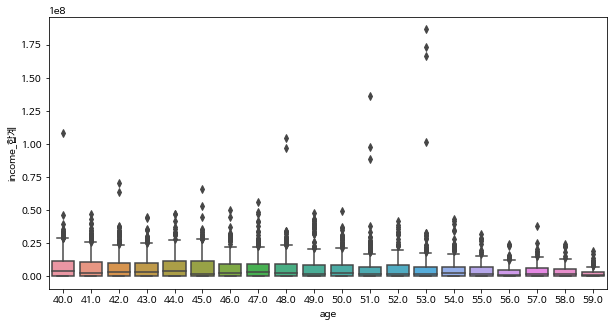

In [15]:
# 40대~50대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 40) & (group1['age']<60)], x ='age',y='income_합계')

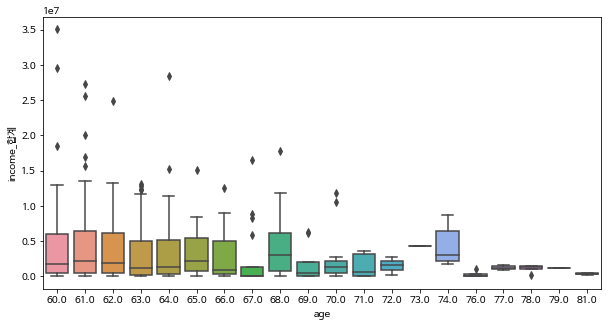

In [16]:
# 60대~80대
plt.figure(figsize=(10,5))
sns.boxplot(data = group1[(group1['age'] >= 60) & (group1['age']<90)], x ='age',y='income_합계')

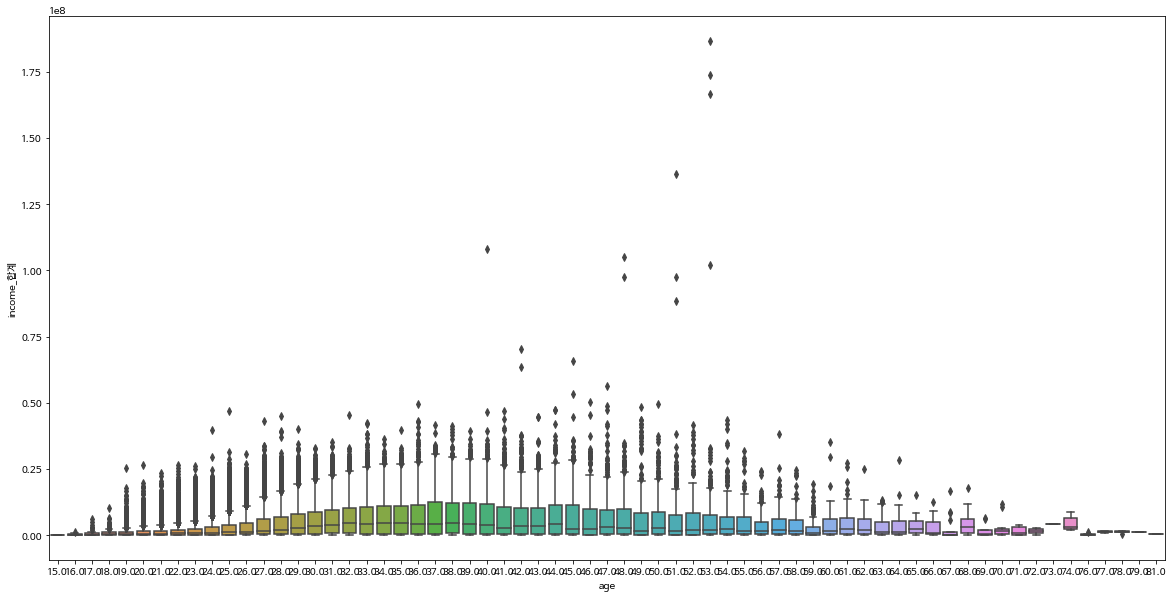

In [17]:
# 전체
plt.figure(figsize=(20,10))
sns.boxplot(data = group1, x ='age',y='income_합계')

In [18]:
def age_category(age):
    category =''
    if age < 20:
        category = '10대'
    elif 20 <= age <= 23:
        category = '20대초반'
    elif 24 <= age <= 26:
        category = '20대중반'
    elif 27 <= age <= 29:
        category = '20대후반'
    elif 30 <= age <= 33:
        category = '30대초반'
    elif 34 <= age <= 36:
        category = '30대중반'
    elif 37 <= age <= 39:
        category = '30대후반'
    elif age < 50:
        category = '40대'
    elif age < 60:
        category = '50대'
    elif age < 70:
        category = '60대'
    else:
        category = '70대이상'
    return category

In [19]:
group1['연령대'] = group1['age'].apply(age_category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
group1.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료,income_합계,연령대
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,0.0,4600.0,10062000.0,20대후반
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,0.0,1815000.0,98300.0,19907000.0,30대중반
2,28.0,F,2017,289000.0,11500.0,0,0.0,1461000.0,0.0,277500.0,1461000.0,20대후반
3,27.0,M,2019,410000.0,16200.0,0,0.0,2471000.0,0.0,393800.0,2471000.0,20대후반
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,0.0,109700.0,689000.0,20대중반


# 칼럼별로 살펴보기 (숫자형)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

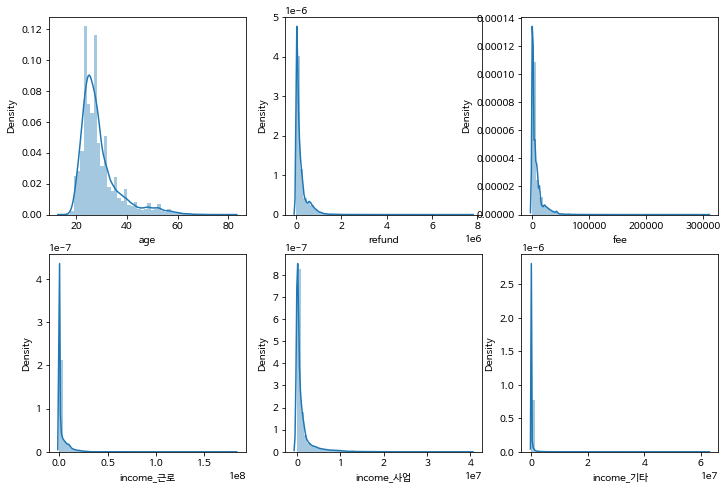

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(231)
sns.distplot(group1['age'])
plt.subplot(232)
sns.distplot(group1['refund'])
plt.subplot(233)
sns.distplot(group1['fee'])
plt.subplot(234)
sns.distplot(group1['income_근로'])
plt.subplot(235)
sns.distplot(group1['income_사업'])
plt.subplot(236)
sns.distplot(group1['income_기타'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

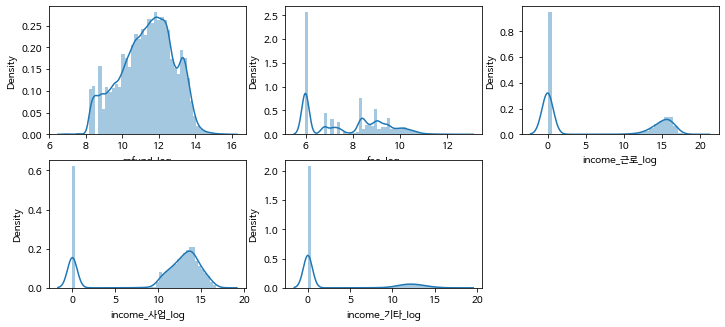

In [22]:
# refund, fee, income_근로, income_사업, income_기타에 로그 취하기
group1['refund_log'] = np.log1p(group1['refund'])
group1['fee_log'] = np.log1p(group1['fee'])
group1['income_근로_log'] = np.log1p(group1['income_근로'])
group1['income_사업_log'] = np.log1p(group1['income_사업'])
group1['income_기타_log'] = np.log1p(group1['income_기타'])

plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(group1['refund_log'])
plt.subplot(3,3,2)
sns.distplot(group1['fee_log'])
plt.subplot(3,3,3)
sns.distplot(group1['income_근로_log'])
plt.subplot(3,3,4)
sns.distplot(group1['income_사업_log'])
plt.subplot(3,3,5)
sns.distplot(group1['income_기타_log'])


# 칼럼별로 살펴보기 (문자형)

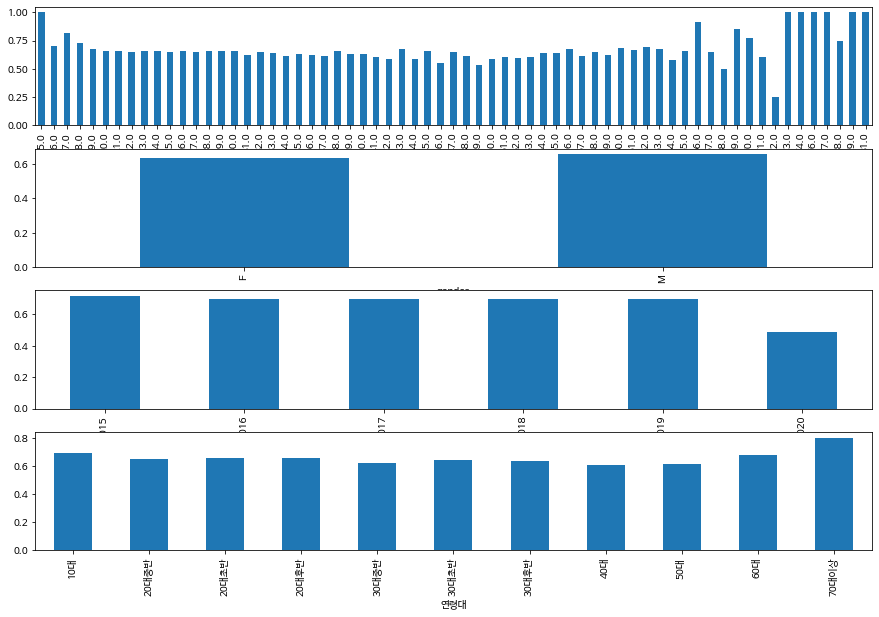

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(411)
group1.groupby('age')['has_paid'].mean().sort_index().plot(kind='bar')
plt.subplot(412)
group1.groupby('gender')['has_paid'].mean().sort_values().plot(kind='bar')
plt.subplot(413)
group1.groupby('year')['has_paid'].mean().sort_index().plot(kind='bar')
plt.subplot(414)
group1.groupby('연령대')['has_paid'].mean().sort_index().plot(kind='bar')

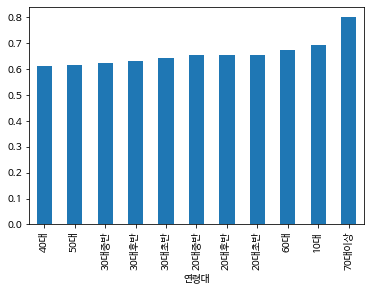

In [24]:
group1.groupby('연령대')['has_paid'].mean().sort_values().plot(kind='bar')

In [25]:
group1.groupby(['연령대'])['has_paid'].agg(['mean','count']).sort_values('mean')

,mean,count
연령대,,
40대,0.610149,5892
50대,0.617062,3118
30대중반,0.622090,5197
30대후반,0.632501,3766
30대초반,0.642071,13173
20대중반,0.653034,26726
20대후반,0.653467,21389
20대초반,0.654702,18778
60대,0.674897,486


In [26]:
group1.groupby('연령대')['has_paid'].sum()

연령대
10대        886
20대중반    17453
20대초반    12294
20대후반    13977
30대중반     3233
30대초반     8458
30대후반     2382
40대       3595
50대       1924
60대        328
70대이상       36
Name: has_paid, dtype: int64

In [27]:
# 60대와 70대 이상을 합친다.
group1.loc[group1['연령대'].isin(['60대','70대이상']),'연령대'] = '60대이상'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [28]:
group1.groupby('연령대')['has_paid'].sum()

연령대
10대        886
20대중반    17453
20대초반    12294
20대후반    13977
30대중반     3233
30대초반     8458
30대후반     2382
40대       3595
50대       1924
60대이상      364
Name: has_paid, dtype: int64

In [29]:
# 최종 칼럼 선택
group1_final = group1.copy()
group1_final = group1_final[['gender','year','연령대','refund_log','fee_log','income_근로_log','income_사업_log','income_기타_log','has_paid']]
group1_final['year'] = group1_final['year'].astype(str)

# AutoML 적용

In [30]:
!pip install pycaret

In [31]:
from pycaret.classification import *

In [32]:
clf = setup(data=group1_final, target='has_paid',train_size=0.8, session_id=6, use_gpu=True)

,Description,Value
0,session_id,6
1,Target,has_paid
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(99848, 9)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
best_3_models = compare_models(sort='F1',n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7300,0.7801,0.8963,0.7407,0.8111,0.3523,0.3726,0.748
gbc,Gradient Boosting Classifier,0.7291,0.7751,0.8886,0.7430,0.8093,0.3543,0.3717,8.100
lr,Logistic Regression,0.7144,0.7322,0.8664,0.7378,0.7970,0.3258,0.3380,2.290
ridge,Ridge Classifier,0.7142,0.0000,0.8675,0.7372,0.7970,0.3247,0.3373,0.158
ada,Ada Boost Classifier,0.7142,0.7457,0.8660,0.7378,0.7967,0.3255,0.3376,2.440
lda,Linear Discriminant Analysis,0.7141,0.7327,0.8596,0.7403,0.7955,0.3292,0.3395,0.326
svm,SVM - Linear Kernel,0.7069,0.0000,0.8273,0.7497,0.7841,0.3266,0.3393,1.192
knn,K Neighbors Classifier,0.6925,0.7072,0.8095,0.7398,0.7731,0.2995,0.3024,7.400
rf,Random Forest Classifier,0.6872,0.7229,0.8041,0.7366,0.7688,0.2881,0.2907,10.162
et,Extra Trees Classifier,0.6716,0.6844,0.7714,0.7344,0.7525,0.2657,0.2665,10.922


In [34]:
tuned_top3 = [tune_model(i) for i in best_3_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7198,0.7398,0.8638,0.7442,0.7996,0.3427,0.3534
1,0.7117,0.7267,0.8700,0.7338,0.7961,0.3160,0.3297
2,0.7134,0.7294,0.8671,0.7366,0.7966,0.3228,0.3353
3,0.7146,0.7307,0.8676,0.7375,0.7973,0.3256,0.3381
4,0.7133,0.7317,0.8638,0.7379,0.7959,0.3244,0.3360
5,0.7235,0.7461,0.8771,0.7423,0.8041,0.3451,0.3593
6,0.7092,0.7200,0.8669,0.7326,0.7941,0.3108,0.3238
7,0.7175,0.7330,0.8639,0.7418,0.7982,0.3361,0.3471
8,0.7123,0.7314,0.8612,0.7379,0.7948,0.3231,0.3341
9,0.7114,0.7336,0.8632,0.7362,0.7947,0.3194,0.3311


In [36]:
blender_top3 = blend_models(estimator_list=tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7290,0.7780,0.8866,0.7437,0.8089,0.3551,0.3717
1,0.7230,0.7670,0.8938,0.7352,0.8067,0.3337,0.3542
2,0.7303,0.7767,0.8980,0.7404,0.8116,0.3523,0.3733
3,0.7285,0.7751,0.8897,0.7420,0.8092,0.3519,0.3698
4,0.7287,0.7750,0.8957,0.7398,0.8103,0.3490,0.3693
5,0.7337,0.7853,0.8957,0.7446,0.8132,0.3633,0.3826
6,0.7213,0.7677,0.8860,0.7366,0.8045,0.3337,0.3514
7,0.7273,0.7768,0.8887,0.7412,0.8083,0.3494,0.3671
8,0.7276,0.7739,0.8883,0.7416,0.8084,0.3501,0.3677
9,0.7271,0.7757,0.8943,0.7388,0.8091,0.3451,0.3652


In [43]:
# feature_importance 측정을 위해 상위 1개 알고리즘만 가지고 모델 만들기
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7272,0.7808,0.8851,0.7427,0.8076,0.3510,0.3674
1,0.7241,0.7720,0.8973,0.7349,0.8080,0.3348,0.3566
2,0.7356,0.7851,0.9071,0.7418,0.8162,0.3620,0.3861
3,0.7320,0.7801,0.8918,0.7445,0.8115,0.3606,0.3787
4,0.7282,0.7801,0.9007,0.7374,0.8109,0.3446,0.3672
5,0.7360,0.7877,0.8982,0.7457,0.8149,0.3682,0.3882
6,0.7267,0.7756,0.8951,0.7382,0.8091,0.3436,0.3641
7,0.7305,0.7821,0.8943,0.7420,0.8111,0.3550,0.3744
8,0.7274,0.7783,0.8934,0.7395,0.8092,0.3468,0.3664
9,0.7291,0.7796,0.8992,0.7388,0.8111,0.3480,0.3698


In [44]:
lgbm_tuned = tune_model(lgbm, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7297,0.7809,0.8878,0.7440,0.8095,0.3565,0.3735
1,0.7253,0.7721,0.8994,0.7352,0.8091,0.3371,0.3597
2,0.7349,0.7845,0.9009,0.7435,0.8147,0.3635,0.3849
3,0.7307,0.7803,0.8884,0.7447,0.8102,0.3590,0.3760
4,0.7282,0.7806,0.9019,0.7369,0.8111,0.3439,0.3670
5,0.7337,0.7866,0.8959,0.7445,0.8132,0.3632,0.3826
6,0.7267,0.7747,0.8913,0.7397,0.8084,0.3459,0.3648
7,0.7303,0.7800,0.8924,0.7426,0.8107,0.3558,0.3744
8,0.7301,0.7778,0.8907,0.7431,0.8102,0.3559,0.3739
9,0.7303,0.7791,0.8970,0.7408,0.8114,0.3528,0.3734


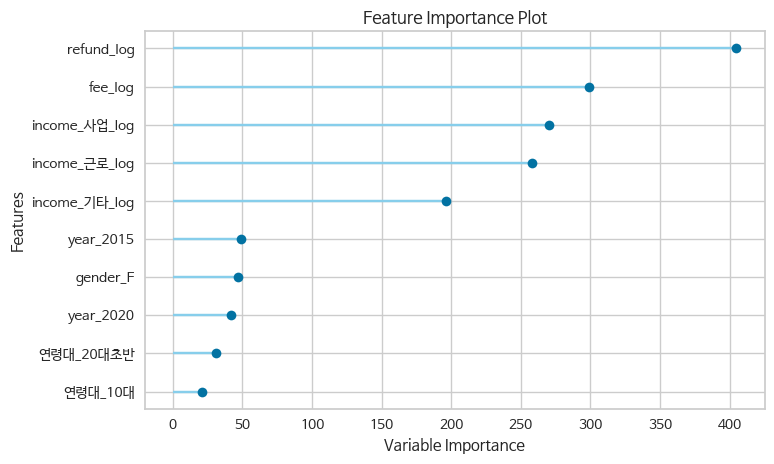

In [48]:
plot_model(lgbm_tuned, plot='feature')

# 어떤 전처리도 하지 않고 바로 autoML을 사용

In [49]:
df = pd.read_csv('/content/drive/MyDrive/자비스앤빌런즈/Jobis_3o3.csv')

In [50]:
classification = setup(data=df, target='has_paid',train_size=0.8, session_id=6, use_gpu=True)

,Description,Value
0,session_id,6
1,Target,has_paid
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(100000, 9)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [51]:
best_5_models = compare_models(sort='F1',n_select=5, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7315,0.7807,0.8970,0.7417,0.8120,0.3567,0.3771,0.756
gbc,Gradient Boosting Classifier,0.7304,0.7738,0.8962,0.7411,0.8113,0.3541,0.3744,7.502
ada,Ada Boost Classifier,0.7164,0.7448,0.8731,0.7368,0.7992,0.3279,0.3419,2.198
ridge,Ridge Classifier,0.6634,0.0000,0.9180,0.6767,0.7791,0.1357,0.1684,0.130
rf,Random Forest Classifier,0.6972,0.7382,0.8177,0.7408,0.7774,0.3077,0.3114,9.750
lr,Logistic Regression,0.6467,0.5590,0.9526,0.6562,0.7771,0.0491,0.0794,0.564
lda,Linear Discriminant Analysis,0.6627,0.6347,0.9026,0.6802,0.7758,0.1463,0.1732,0.244
nb,Naive Bayes,0.6431,0.5747,0.9144,0.6622,0.7681,0.0728,0.0947,0.092
et,Extra Trees Classifier,0.6847,0.7078,0.7986,0.7361,0.7661,0.2849,0.2871,10.298
knn,K Neighbors Classifier,0.6700,0.6555,0.8058,0.7182,0.7595,0.2395,0.2436,5.952


In [52]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.7827,0.9010,0.7452,0.8157,0.3692,0.3903
1,0.7302,0.7770,0.8985,0.7400,0.8116,0.3522,0.3734
2,0.7321,0.7818,0.8929,0.7440,0.8117,0.3608,0.3793
3,0.7315,0.7824,0.9051,0.7386,0.8134,0.3520,0.3761
4,0.7269,0.7790,0.8964,0.7376,0.8093,0.3439,0.3649
5,0.7281,0.7827,0.8834,0.7440,0.8077,0.3551,0.3707
6,0.7265,0.7759,0.9031,0.7347,0.8102,0.3388,0.3629
7,0.7314,0.7803,0.8966,0.7418,0.8119,0.3567,0.3769
8,0.7362,0.7854,0.8969,0.7463,0.8147,0.3703,0.3897
9,0.7319,0.7838,0.8987,0.7414,0.8125,0.3569,0.3779


In [53]:
lgbm_model_tuned = tune_model(lgbm_model, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7341,0.7815,0.8921,0.7463,0.8127,0.3669,0.3847
1,0.7330,0.7781,0.8941,0.7444,0.8124,0.3626,0.3814
2,0.7328,0.7812,0.8877,0.7468,0.8112,0.3655,0.3819
3,0.7324,0.7819,0.8989,0.7418,0.8128,0.3582,0.3792
4,0.7261,0.7780,0.8898,0.7395,0.8077,0.3457,0.3641
5,0.7268,0.7831,0.8809,0.7437,0.8065,0.3527,0.3677
6,0.7236,0.7746,0.8937,0.7356,0.8070,0.3363,0.3567
7,0.7294,0.7777,0.8875,0.7436,0.8092,0.3563,0.3732
8,0.7366,0.7850,0.8896,0.7497,0.8137,0.3755,0.3919
9,0.7330,0.7847,0.8960,0.7436,0.8127,0.3616,0.3813


In [56]:
final_model = finalize_model(lgbm_model_tuned)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [59]:
final_model

LGBMClassifier(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=90, n_jobs=-1, num_leaves=20, objective=None,
               random_state=6, reg_alpha=0.05, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

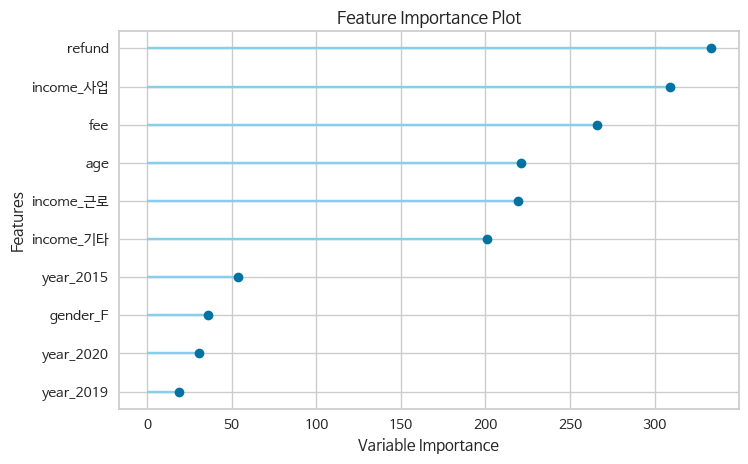

In [57]:
plot_model(final_model, plot='feature')

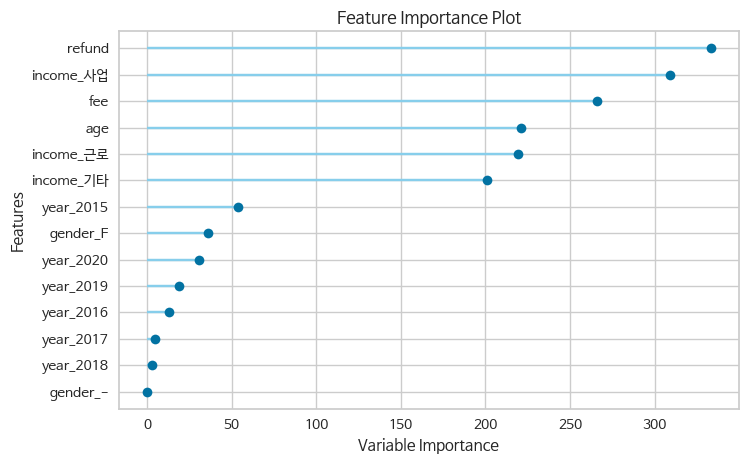

In [58]:
plot_model(final_model, plot='feature_all')

- 어떤 전처리도 하지 않은 상태에서 AutoML을 적용했을 때 더 성능이 좋았다.(...)

In [74]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

df['year'] = df['year'].astype(str)
df2 = pd.get_dummies(df)

X_features = df2.drop('has_paid', axis=1)
y_labels = df2['has_paid']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=6)

lgbm_classifier = LGBMClassifier(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=90, n_jobs=-1, num_leaves=20, objective=None,
               random_state=6, reg_alpha=0.05, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   refund     100000 non-null  float64
 2   fee        100000 non-null  float64
 3   has_paid   100000 non-null  bool   
 4   income_근로  40791 non-null   float64
 5   income_사업  78227 non-null   float64
 6   income_기타  25260 non-null   float64
 7   gender_-   100000 non-null  uint8  
 8   gender_F   100000 non-null  uint8  
 9   gender_M   100000 non-null  uint8  
 10  year_2015  100000 non-null  uint8  
 11  year_2016  100000 non-null  uint8  
 12  year_2017  100000 non-null  uint8  
 13  year_2018  100000 non-null  uint8  
 14  year_2019  100000 non-null  uint8  
 15  year_2020  100000 non-null  uint8  
dtypes: bool(1), float64(6), uint8(9)
memory usage: 5.5 MB


In [76]:
lgbm_classifier.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


LGBMClassifier(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=90, n_jobs=-1, num_leaves=20, objective=None,
               random_state=6, reg_alpha=0.05, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

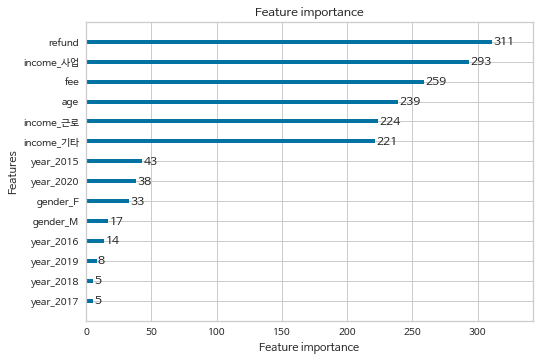

In [77]:
from lightgbm import plot_importance
plot_importance(lgbm_classifier)

In [78]:
!pip install eli5

In [79]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgbm_classifier, random_state=6).fit(X_test,y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.1130 ± 0.0037,income_사업
0.0368 ± 0.0025,income_기타
0.0295 ± 0.0031,year_2020
0.0189 ± 0.0021,fee
0.0078 ± 0.0019,refund
0.0028 ± 0.0017,income_근로
0.0023 ± 0.0011,age
0.0007 ± 0.0009,gender_F
0.0004 ± 0.0006,year_2015
0.0004 ± 0.0002,year_2017


# 결론
- 허무하게도 각종 전처리를 한 후 AutoML을 적용하는 것보다 주어진 dataset에 곧바로 AutoML을 적용하는 것이 더 성능이 좋다.
- 수수료 지불 여부를 결정하는데 중요한 요인은 refund(예상환금액), income_사업(사업소득), fee(수수료), age(연령), income_근로(사업소득), income_기타(기타소득)이며 연도, 성별 등은 큰 영향을 미치지 않는다.
- 다만 feature importance는 tree 구조를 만들기 위한 피처들의 불순도가 중요 기준이기에 결정 값과 관련이 없어도 높아질 수 있다.
- 따라서 permutation_importance 적용 결과 income_근로(사업소득), income_기타(기타소득), year_2020(2020년도), fee(수수료), refund(예상환급액) 순으로 수수료 결제 여부에 영향을 미친다.